In [1]:
import pandas as pd
import numpy as np
population1 = pd.read_csv('C:/Users/tina/Desktop/data/world-population-by-country-2020.csv')
population2 = pd.read_csv('C:/Users/tina/Desktop/data/world-rural-population.csv')
economy1 = pd.read_csv('C:/Users/tina/Desktop/data/Country.csv')
economy2 = pd.read_csv('C:/Users/tina/Desktop/data/Cost_of_Living_Index_2022.csv')
economy3 = pd.read_csv('C:/Users/tina/Desktop/data/GDP by Country 1999-2022.csv')
economy4 = pd.read_csv('C:/Users/tina/Desktop/data/Country_data (Merged).csv')

In [2]:
population1.rename(columns = {'Population 2020':'Population',
                              'Country (or dependency)': 'Country',
                              'Fert. Rate': 'Fertility Rate',
                              'Med. Age': 'Median Age',
                              'Urban Pop %': 'Urban Population (%)',
                              'Migrants (net)': 'Migrants (Net)'}, inplace = True)

population1.replace(',','', regex=True, inplace=True)
population1.replace('%','', regex=True, inplace=True)

population1 = pd.concat([pd.DataFrame([pd.to_numeric(population1[e],errors='coerce') 
                        for e in population1.columns if e not in ['Country']]).T,
                        population1[['Country']]],axis=1)

population1['Population'] = population1['Population'].astype('Int64')
population1['Net Change'] = population1['Net Change'].astype('Int64')
population1['Land Area (Km²)'] = population1['Land Area (Km²)'].astype('Int64')
population1['Migrants (Net)'] = population1['Migrants (Net)'].astype('Int64')
population1['Median Age'] = population1['Median Age'].astype('Int64')
population1['Urban Population (%)'] = population1['Urban Population (%)'].astype('Int64')

del population1["no"]

population1= population1.reset_index(drop=True)

cols = population1.columns.tolist()
cols = cols[-1:] + cols[:-1]
population1 = population1[cols]

In [3]:
population2=population2[['Country Name', 'Country Code', '2020']]

population2.rename(columns = {'Country Name':'Country',
                              'Country Code':'Code',
                              '2020':'Rural Population'}, inplace = True)

# population2 =population2.astype({'Rural Population': int})    (Bu işe yaramadı.)
population2['Rural Population'] = population2['Rural Population'].astype('Int64')

population2= population2[population2['Country'].apply(lambda x: len(x) < 25)]

population2= population2.reset_index(drop=True)

In [4]:
economy1= economy1[['CountryCode', 'ShortName', 'Region' ]]

In [5]:
del economy2["Rank"]
# , "Cost of Living Plus Rent Index", "Local Purchasing Power Index"]
del economy2["Cost of Living Plus Rent Index"]
del economy2["Local Purchasing Power Index"]

In [6]:
economy3=economy3[['Country', '2022']]
economy3.columns = economy3.columns.str.replace('2022', 'GDP (2022)')

economy3['GDP (2022)']= pd.to_numeric(economy3['GDP (2022)'], errors='coerce')
economy3['GDP (2022)'].replace(',','', regex=True, inplace=True)

In [7]:
economy4=economy4[['name','region','gini','growthRate','birthRate','infantMortalityRate','lifeExpectancy',
                   'inflation','unemployment','agricultureLabour','servicesLabour','industryLabour',]]

economy4.rename(columns = {'name': 'Country',
                           'region': 'Region',
                            'gini': 'Gini Index',
                            'growthRate': 'Growth Rate',
                            'birthRate': 'Birth Rate',
                            'infantMortalityRate': 'Infant Mortality Rate',
                            'lifeExpectancy': 'Life Expectancy',
                            'inflation': 'Inflation (2020)',
                            'unemployment': 'Unemployment',
                            'agricultureLabour': 'Agriculture Labour',
                            'servicesLabour': 'Services Labour',
                            'industryLabour': 'Industry Labour'}, inplace = True)

economy4.replace('%','', regex=True, inplace=True)
economy4.replace('/1000','', regex=True, inplace=True)

economy5= economy4[['Country', 'Region']]
del economy4["Region"]

economy4 = pd.concat([pd.DataFrame([pd.to_numeric(economy4[e],errors='coerce') 
                    for e in economy4.columns if e not in ['Country']]).T,
                    economy4[['Country']]],axis=1)

economy4=pd.merge(economy4, economy5)

In [8]:
population1.head(5)

,Country,Population,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (Net),Fertility Rate,Median Age,Urban Population (%),World Share
0,China,1439323776,0.39,5540090,153.0,9388211,-348399,1.7,38,61,18.47
1,India,1380004385,0.99,13586631,464.0,2973190,-532687,2.2,28,35,17.70
2,United States,331002651,0.59,1937734,36.0,9147420,954806,1.8,38,83,4.25
3,Indonesia,273523615,1.07,2898047,151.0,1811570,-98955,2.3,30,56,3.51
4,Pakistan,220892340,2.00,4327022,287.0,770880,-233379,3.6,23,35,2.83


In [9]:
population1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               235 non-null    object 
 1   Population            235 non-null    Int64  
 2   Yearly Change         235 non-null    float64
 3   Net Change            235 non-null    Int64  
 4   Density  (P/Km²)      235 non-null    float64
 5   Land Area (Km²)       235 non-null    Int64  
 6   Migrants (Net)        201 non-null    Int64  
 7   Fertility Rate        201 non-null    float64
 8   Median Age            201 non-null    Int64  
 9   Urban Population (%)  222 non-null    Int64  
 10  World Share           235 non-null    float64
dtypes: Int64(6), float64(4), object(1)
memory usage: 21.7+ KB


In [10]:
population2.tail(5)

,Country,Code,Rural Population
236,Kosovo,XKX,<NA>
237,"Yemen, Rep.",YEM,18519540
238,South Africa,ZAF,19361915
239,Zambia,ZMB,10179380
240,Zimbabwe,ZWE,10070822


In [11]:
population2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country           241 non-null    object
 1   Code              241 non-null    object
 2   Rural Population  237 non-null    Int64 
dtypes: Int64(1), object(2)
memory usage: 6.0+ KB


In [12]:
economy1.tail(5)

,CountryCode,ShortName,Region
242,WBG,West Bank and Gaza,Middle East & North Africa
243,WLD,World,NaN
244,YEM,Yemen,Middle East & North Africa
245,ZMB,Zambia,Sub-Saharan Africa
246,ZWE,Zimbabwe,Sub-Saharan Africa


In [13]:
economy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CountryCode  247 non-null    object
 1   ShortName    247 non-null    object
 2   Region       214 non-null    object
dtypes: object(3)
memory usage: 5.9+ KB


In [14]:
economy2.head(5)

,Country,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index
0,Afghanistan,20.37,2.72,14.92,12.41
1,Albania,35.50,8.47,29.32,25.82
2,Algeria,26.87,4.59,28.82,14.48
3,Argentina,34.69,7.71,28.17,33.32
4,Armenia,33.89,11.61,27.59,30.55


In [15]:
economy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 139 non-null    object 
 1   Cost of Living Index    139 non-null    float64
 2   Rent Index              139 non-null    float64
 3   Groceries Index         139 non-null    float64
 4   Restaurant Price Index  139 non-null    float64
dtypes: float64(4), object(1)
memory usage: 5.6+ KB


In [16]:
economy3.head(5)

,Country,GDP (2022)
0,"Afghanistan, Rep. of.",0.000
1,Albania,18.012
2,Algeria,168.195
3,Angola,74.953
4,Antigua and Barbuda,1.534


In [17]:
economy3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     180 non-null    object 
 1   GDP (2022)  163 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.9+ KB


In [18]:
economy4.head(5)

,Gini Index,Growth Rate,Birth Rate,Infant Mortality Rate,Life Expectancy,Inflation (2020),Unemployment,Agriculture Labour,Services Labour,Industry Labour,Country,Region
0,27.8,2.30,38.80,117.23,50.49,6.8,35.0,80.0,10.0,10.0,Afghanistan,Asia
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Åland Islands,Europe
2,34.5,0.30,12.73,13.19,77.96,1.7,16.9,54.0,32.6,12.8,Albania,Europe
3,35.3,1.88,23.99,21.76,76.39,3.9,10.3,14.0,NaN,13.4,Algeria,Africa
4,NaN,NaN,22.87,8.92,74.91,NaN,29.8,NaN,NaN,NaN,American Samoa,Oceania


In [19]:
economy4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gini Index             153 non-null    float64
 1   Growth Rate            165 non-null    float64
 2   Birth Rate             179 non-null    float64
 3   Infant Mortality Rate  180 non-null    float64
 4   Life Expectancy        181 non-null    float64
 5   Inflation (2020)       166 non-null    float64
 6   Unemployment           154 non-null    float64
 7   Agriculture Labour     143 non-null    float64
 8   Services Labour        141 non-null    float64
 9   Industry Labour        140 non-null    float64
 10  Country                250 non-null    object 
 11  Region                 248 non-null    object 
dtypes: float64(10), object(2)
memory usage: 25.4+ KB


In [20]:
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz

temp1 = [x for x in set(population1['Country']) if x not in set(population2['Country'])]
temp2 = [x for x in set(population2['Country']) if x not in set(population1['Country'])]

for i, j in enumerate(temp2):
    n= 70
    for k in temp1:
        m= fuzz.partial_ratio(j, k)
        if n<=m and m>70:
            population2.replace(j, k, inplace=True)
            # population2.loc[i, ('Country')] = k
            n= fuzz.partial_ratio(j, k)

C:\Users\tina\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
# population2[population2.duplicated(['Country'], keep=False)]

In [21]:
population2.replace('Korea, Rep.', 'South Korea', inplace=True)
population2.replace('Kyrgyz Republic', 'Kyrgyzstan', inplace=True)

duppyrows= ['COG', 'CUW', 'SSF', 'TCA']
population2 = population2[population2.Code.isin(duppyrows) == False]

In [22]:
# population2.iloc[[0,1,3],[0]] = 45

In [23]:
world1= pd.merge(population1, population2, on='Country', how='left')
world1.head(10)

,Country,Population,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (Net),Fertility Rate,Median Age,Urban Population (%),World Share,Code,Rural Population
0,China,1439323776,0.39,5540090,153.0,9388211,-348399,1.7,38,61,18.47,CHN,544223674
1,India,1380004385,0.99,13586631,464.0,2973190,-532687,2.2,28,35,17.70,IND,898024053
2,United States,331002651,0.59,1937734,36.0,9147420,954806,1.8,38,83,4.25,USA,57469027
3,Indonesia,273523615,1.07,2898047,151.0,1811570,-98955,2.3,30,56,3.51,IDN,118597107
4,Pakistan,220892340,2.00,4327022,287.0,770880,-233379,3.6,23,35,2.83,PAK,138797696
5,Brazil,212559417,0.72,1509890,25.0,8358140,21200,1.7,33,88,2.73,BRA,27477555
6,Nigeria,206139589,2.58,5175990,226.0,910770,-60000,5.4,18,52,2.64,NGA,99033580
7,Bangladesh,164689383,1.01,1643222,1265.0,130170,-369501,2.1,28,39,2.11,BGD,101815917
8,Russia,145934462,0.04,62206,9.0,16376870,182456,1.8,40,74,1.87,RUS,36380516
9,Mexico,128932753,1.06,1357224,66.0,1943950,-60000,2.1,29,84,1.65,MEX,24844052


In [24]:
temp1 = [x for x in set(population1['Country']) if x not in set(economy2['Country'])]
temp2 = [x for x in set(economy2['Country']) if x not in set(population1['Country'])]

for i, j in enumerate(temp2):
    n= 70
    for k in temp1:
        m= fuzz.partial_ratio(j, k)
        if n<=m and m>70:
            economy2.replace(j, k, inplace=True)
            n= fuzz.partial_ratio(j, k)

In [ ]:
# pop= pd.concat([economy4, ec4]).drop_duplicates(keep=False)

In [ ]:
# economy4[economy4.duplicated(['Country'], keep=False)]

In [ ]:
# fuzz.partial_ratio("Czech Republic", "Czech Republic (Czechia)")

In [25]:
world2= pd.merge(world1, economy2, on='Country', how='left')
world2.head(10)

,Country,Population,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (Net),Fertility Rate,Median Age,Urban Population (%),World Share,Code,Rural Population,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index
0,China,1439323776,0.39,5540090,153.0,9388211,-348399,1.7,38,61,18.47,CHN,544223674,41.77,16.53,46.01,28.37
1,India,1380004385,0.99,13586631,464.0,2973190,-532687,2.2,28,35,17.70,IND,898024053,24.43,5.30,26.43,17.56
2,United States,331002651,0.59,1937734,36.0,9147420,954806,1.8,38,83,4.25,USA,57469027,70.13,42.07,70.37,70.07
3,Indonesia,273523615,1.07,2898047,151.0,1811570,-98955,2.3,30,56,3.51,IDN,118597107,35.85,9.82,38.29,17.74
4,Pakistan,220892340,2.00,4327022,287.0,770880,-233379,3.6,23,35,2.83,PAK,138797696,19.92,3.91,17.81,15.54
5,Brazil,212559417,0.72,1509890,25.0,8358140,21200,1.7,33,88,2.73,BRA,27477555,33.24,8.27,28.16,25.24
6,Nigeria,206139589,2.58,5175990,226.0,910770,-60000,5.4,18,52,2.64,NGA,99033580,30.49,35.99,33.65,20.92
7,Bangladesh,164689383,1.01,1643222,1265.0,130170,-369501,2.1,28,39,2.11,BGD,101815917,33.13,4.42,30.41,21.70
8,Russia,145934462,0.04,62206,9.0,16376870,182456,1.8,40,74,1.87,RUS,36380516,35.26,13.09,29.86,34.56
9,Mexico,128932753,1.06,1357224,66.0,1943950,-60000,2.1,29,84,1.65,MEX,24844052,35.35,12.55,34.82,32.67


In [26]:
temp1 = [x for x in set(population1['Country']) if x not in set(economy3['Country'])]
temp2 = [x for x in set(economy3['Country']) if x not in set(population1['Country'])]

for i, j in enumerate(temp2):
    n= 70
    for k in temp1:
        m= fuzz.partial_ratio(j, k)
        if n<=m and m>70:
            economy3.replace(j, k, inplace=True)
            n= fuzz.partial_ratio(j, k)

In [27]:
economy3.replace('Kyrgyz Republic', 'Kyrgyzstan', inplace=True)
economy3.replace('Swaziland', 'Eswatini', inplace=True)

economy3.drop([37], axis=0, inplace=True)

In [28]:
world3= pd.merge(world1, economy3, on='Country', how='left')

In [29]:
temp1 = [x for x in set(population1['Country']) if x not in set(economy4['Country'])]
temp2 = [x for x in set(economy4['Country']) if x not in set(population1['Country'])]

for i, j in enumerate(temp2):
    n= 70
    for k in temp1:
        m= fuzz.partial_ratio(j, k)
        if n<=m and m>70:
            economy4.replace(j, k, inplace=True)
            n= fuzz.partial_ratio(j, k)

In [30]:
economy4.drop([1, 30, 33, 34, 187, 191, 233], axis=0, inplace=True)

economy4.replace("Korea (Democratic People's Republic of)", 'North Korea', inplace=True)
economy4.replace('Korea (Republic of)', 'South Korea', inplace=True)
economy4.replace('Swaziland', 'Eswatini', inplace=True)

In [31]:
world= pd.merge(world1, economy4, on='Country', how='left')

In [32]:
world.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 0 to 236
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                237 non-null    object 
 1   Population             237 non-null    Int64  
 2   Yearly Change          237 non-null    float64
 3   Net Change             237 non-null    Int64  
 4   Density  (P/Km²)       237 non-null    float64
 5   Land Area (Km²)        237 non-null    Int64  
 6   Migrants (Net)         203 non-null    Int64  
 7   Fertility Rate         203 non-null    float64
 8   Median Age             203 non-null    Int64  
 9   Urban Population (%)   224 non-null    Int64  
 10  World Share            237 non-null    float64
 11  Code                   211 non-null    object 
 12  Rural Population       209 non-null    Int64  
 13  Gini Index             151 non-null    float64
 14  Growth Rate            164 non-null    float64
 15  Birth 

In [33]:
world. head(7)

,Country,Population,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (Net),Fertility Rate,Median Age,Urban Population (%),...,Growth Rate,Birth Rate,Infant Mortality Rate,Life Expectancy,Inflation (2020),Unemployment,Agriculture Labour,Services Labour,Industry Labour,Region
0,China,1439323776,0.39,5540090,153.0,9388211,-348399,1.7,38,61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
1,India,1380004385,0.99,13586631,464.0,2973190,-532687,2.2,28,35,...,1.25,19.89,43.19,67.80,9.6,8.8,49.0,31.0,20.0,Asia
2,United States,331002651,0.59,1937734,36.0,9147420,954806,1.8,38,83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oceania
3,United States,331002651,0.59,1937734,36.0,9147420,954806,1.8,38,83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Americas
4,Indonesia,273523615,1.07,2898047,151.0,1811570,-98955,2.3,30,56,...,0.95,17.04,25.16,72.17,7.7,6.6,38.9,47.9,13.2,Asia
5,Pakistan,220892340,2.00,4327022,287.0,770880,-233379,3.6,23,35,...,1.49,23.19,57.48,67.05,7.7,6.6,45.1,34.2,20.7,Asia
6,Brazil,212559417,0.72,1509890,25.0,8358140,21200,1.7,33,88,...,1.10,17.48,NaN,72.79,6.5,6.0,20.0,66.0,14.0,Americas


In [ ]:
# En büyük dataset oluşturuldu.  Şimdi küçükler:

In [34]:
null= world[world['Region'].apply(lambda x: x != x)]

In [35]:
null

,Country,Population,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (Net),Fertility Rate,Median Age,Urban Population (%),...,Growth Rate,Birth Rate,Infant Mortality Rate,Life Expectancy,Inflation (2020),Unemployment,Agriculture Labour,Services Labour,Industry Labour,Region
16,DR Congo,89561403,3.19,2770836,40.0,2267050,23861,6.0,17,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,State of Palestine,5101414,2.41,119994,847.0,6020,-10563,3.7,21,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,North Macedonia,2083374,0.00,-85,83.0,25220,-1000,1.5,39,59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,Micronesia,548914,1.00,5428,784.0,700,-2957,2.9,27,68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,Channel Islands,173863,0.93,1604,915.0,190,1351,1.5,43,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216,Turks and Caicos,38717,1.38,526,41.0,950,<NA>,NaN,<NA>,89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217,Saint Martin,38666,1.75,664,730.0,53,<NA>,NaN,<NA>,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,British Virgin Islands,30231,0.67,201,202.0,150,<NA>,NaN,<NA>,52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,Caribbean Netherlands,26223,0.94,244,80.0,328,<NA>,NaN,<NA>,75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229,Saint Barthelemy,9877,0.30,30,470.0,21,<NA>,NaN,<NA>,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
world.loc[world['Country'] == 'DR Congo', 'Region'] = 'Africa'
world.loc[world['Country'] == 'State of Palestine', 'Region'] = 'Asia'
world.loc[world['Country'] == 'North Macedonia', 'Region'] = 'Europe'
world.loc[world['Country'] == 'Channel Islands', 'Region'] = 'Europe'
world.loc[world['Country'] == 'Sint Maarten', 'Region'] = 'Americas'
world.loc[world['Country'] == 'Turks and Caicos', 'Region'] = 'Americas'
world.loc[world['Country'] == 'British Virgin Islands', 'Region'] = 'Americas'
world.loc[world['Country'] == 'Caribbean Netherlands', 'Region'] = 'Americas'
world.loc[world['Country'] == 'Saint Barthelemy', 'Region'] = 'Americas'
# this is better (no chained indexing alert) than 'dfff[dfff['Book-Title']=="The Kitchen God's Wife"]['Image-URL-M']'

In [ ]:
# ['Asia', 'Europe', 'Africa', 'Oceania', 'Americas', 'Polar', nan]

In [37]:
world.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 0 to 236
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                237 non-null    object 
 1   Population             237 non-null    Int64  
 2   Yearly Change          237 non-null    float64
 3   Net Change             237 non-null    Int64  
 4   Density  (P/Km²)       237 non-null    float64
 5   Land Area (Km²)        237 non-null    Int64  
 6   Migrants (Net)         203 non-null    Int64  
 7   Fertility Rate         203 non-null    float64
 8   Median Age             203 non-null    Int64  
 9   Urban Population (%)   224 non-null    Int64  
 10  World Share            237 non-null    float64
 11  Code                   211 non-null    object 
 12  Rural Population       209 non-null    Int64  
 13  Gini Index             151 non-null    float64
 14  Growth Rate            164 non-null    float64
 15  Birth 

In [38]:
asia= world[world['Region'].apply(lambda x: x == 'Asia')]
europe= world[world['Region'].apply(lambda x: x == 'Europe')]
africa= world[world['Region'].apply(lambda x: x == 'Africa')]
americas= world[world['Region'].apply(lambda x: x == 'Americas')]

In [39]:
economy1.head(5)

,CountryCode,ShortName,Region
0,AFG,Afghanistan,South Asia
1,ALB,Albania,Europe & Central Asia
2,DZA,Algeria,Middle East & North Africa
3,ASM,American Samoa,East Asia & Pacific
4,ADO,Andorra,Europe & Central Asia


In [40]:
ec1short= economy1[economy1['Region'].apply(lambda x: x == 'Latin America & Caribbean' or x == 'North America')]

In [41]:
ec1short.info()  # americas 56

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 6 to 241
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CountryCode  44 non-null     object
 1   ShortName    44 non-null     object
 2   Region       44 non-null     object
dtypes: object(3)
memory usage: 1.4+ KB


In [42]:
ec1short.loc[ec1short['Region'] == 'Latin America & Caribbean', 'Region'] = 'South America'

C:\Users\tina\AppData\Local\Temp\ipykernel_19720\44289489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ec1short.loc[ec1short['Region'] == 'Latin America & Caribbean', 'Region'] = 'South America'


In [43]:
americas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 3 to 233
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                55 non-null     object 
 1   Population             55 non-null     Int64  
 2   Yearly Change          55 non-null     float64
 3   Net Change             55 non-null     Int64  
 4   Density  (P/Km²)       55 non-null     float64
 5   Land Area (Km²)        55 non-null     Int64  
 6   Migrants (Net)         41 non-null     Int64  
 7   Fertility Rate         41 non-null     float64
 8   Median Age             41 non-null     Int64  
 9   Urban Population (%)   51 non-null     Int64  
 10  World Share            55 non-null     float64
 11  Code                   42 non-null     object 
 12  Rural Population       42 non-null     Int64  
 13  Gini Index             27 non-null     float64
 14  Growth Rate            29 non-null     float64
 15  Birth R

In [44]:
ec1short.rename(columns = {'CountryCode':'Code'}, inplace = True)

C:\Users\tina\AppData\Local\Temp\ipykernel_19720\2385047233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ec1short.rename(columns = {'CountryCode':'Code'}, inplace = True)


In [45]:
del americas["Region"]

In [46]:
americas= pd.merge(americas, ec1short, on='Code', how='left')

In [47]:
americas.loc[americas['Country'] == 'Mexico', 'Region'] = 'North America'

In [48]:
for j in ['Mexico', 'Guatemala', 'Haiti', 'Cuba', 'Dominican Republic', 'Honduras', 'Nicaragua', 'Costa Rica',\
          'Panama', 'El Salvador', 'Jamaica', 'Puerto Rico', 'Trinidad and Tobago', 'Guade', 'Belize', 'The Bahamas',\
          'Martinique', 'Greenland', 'Sint Maarten', 'Turks and Caicos']:
    americas.loc[americas['Country'] == j, 'Region'] = 'North America'

for j in ['French Guiana', 'Barbados', 'Greenland', 'Falkland Islands']:
    americas.loc[americas['Country'] == j, 'Region'] = 'South America'

In [49]:
north_america= americas[americas['Region'].apply(lambda x: x == 'North America')]
south_america= americas[americas['Region'].apply(lambda x: x == 'South America')]
                        
# asia= world[world['Region'].apply(lambda x: x == 'Asia')]

In [ ]:
# Şimdi pyplot ile grafikler başlıyor..

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [54]:
!pip install yellowbrick
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [53]:
world.corr()

,Population,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (Net),Fertility Rate,Median Age,Urban Population (%),World Share,...,Gini Index,Growth Rate,Birth Rate,Infant Mortality Rate,Life Expectancy,Inflation (2020),Unemployment,Agriculture Labour,Services Labour,Industry Labour
Population,1.000000,-0.014513,0.852467,-0.027179,0.472593,-0.164794,-0.055646,0.026940,-0.026784,0.999999,...,-0.005785,0.007555,-0.016365,0.105296,-0.063499,0.167200,-0.062737,0.100785,-0.105170,-0.026273
Yearly Change,-0.014513,1.000000,0.187117,-0.026679,-0.000014,-0.033211,0.825134,-0.844253,-0.280188,-0.014487,...,0.259942,0.616322,0.025254,0.731092,-0.667425,0.349756,0.281580,0.749445,-0.620363,-0.431039
Net Change,0.852467,0.187117,1.000000,-0.035156,0.317966,-0.221494,0.162407,-0.187757,-0.141204,0.852319,...,-0.023512,0.115993,-0.008364,0.247685,-0.200237,0.253257,-0.008724,0.238389,-0.231308,-0.107328
Density (P/Km²),-0.027179,-0.026679,-0.035156,1.000000,-0.060037,-0.006307,-0.150953,0.140066,0.040715,-0.027075,...,0.110257,-0.091635,-0.024306,-0.123279,0.222114,-0.062131,-0.092075,-0.122285,0.131297,0.072272
Land Area (Km²),0.472593,-0.000014,0.317966,-0.060037,1.000000,0.338469,-0.056534,0.074343,0.126771,0.472642,...,0.045004,0.045158,-0.025749,0.119058,-0.071793,0.201271,-0.058674,0.019826,0.015956,-0.074706
Migrants (Net),-0.164794,-0.033211,-0.221494,-0.006307,0.338469,1.000000,-0.122954,0.193595,0.270438,-0.164540,...,0.029157,-0.057172,-0.012321,-0.211392,0.168920,-0.185492,-0.025042,-0.225478,0.225026,0.142841
Fertility Rate,-0.055646,0.825134,0.162407,-0.150953,-0.056534,-0.122954,1.000000,-0.883673,-0.491113,-0.055797,...,0.211717,0.551044,0.062595,0.865719,-0.816491,0.338667,0.429403,0.841878,-0.744622,-0.396807
Median Age,0.026940,-0.844253,-0.187757,0.140066,0.074343,0.193595,-0.883673,1.000000,0.539413,0.027048,...,-0.384753,-0.610036,-0.077701,-0.804530,0.799060,-0.410367,-0.348003,-0.810436,0.732215,0.455424
Urban Population (%),-0.026784,-0.280188,-0.141204,0.040715,0.126771,0.270438,-0.491113,0.539413,1.000000,-0.026618,...,-0.075804,-0.229349,-0.033269,-0.506630,0.500865,-0.219230,-0.169649,-0.642512,0.612166,0.224731
World Share,0.999999,-0.014487,0.852319,-0.027075,0.472642,-0.164540,-0.055797,0.027048,-0.026618,1.000000,...,-0.005624,0.007684,-0.016458,0.105222,-0.063448,0.167156,-0.062919,0.100680,-0.105090,-0.026228


<AxesSubplot:>

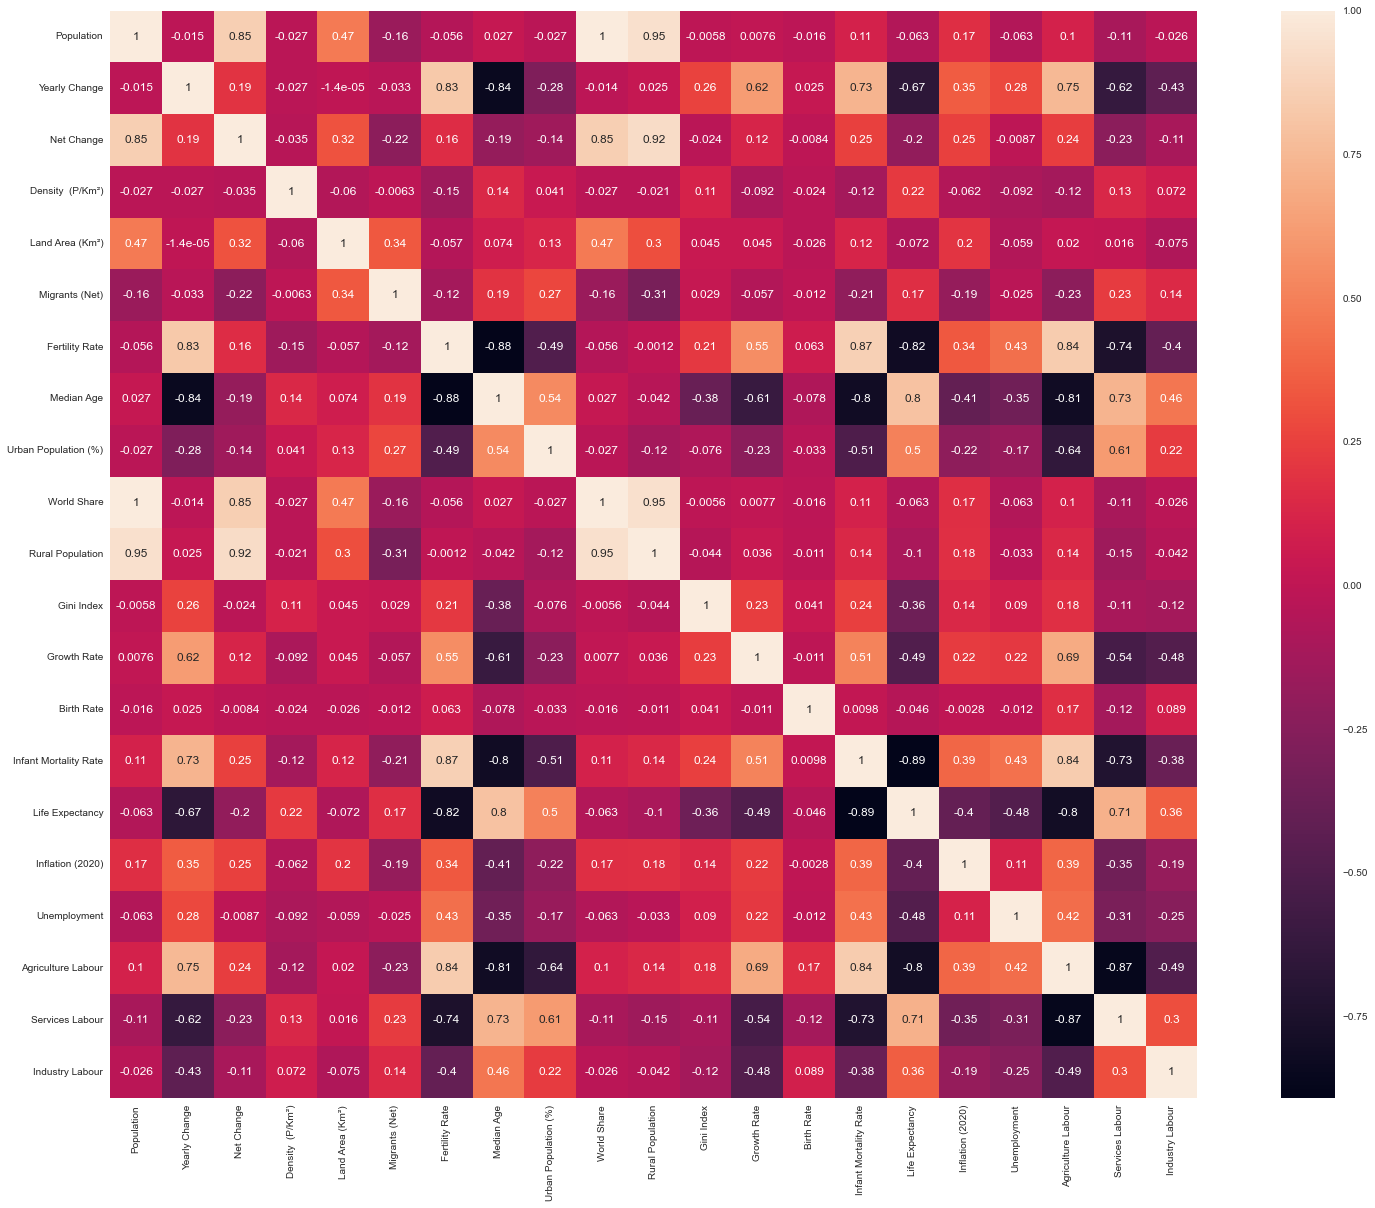

In [55]:
fig=plt.figure(figsize=(30,20))
sns.heatmap(world.corr(), annot=True, square=True)

In [61]:
lst=['Country']
while True:
    choice = input(">")
    lst.append(choice)
    if choice == 'b':
        lst.remove('b')
        break

>Population
>Land Area (Km²)
>b


In [62]:
lst

['Country', 'Population', 'Land Area (Km²)']

In [ ]:
# del dict      useful prop

In [58]:
dct= {'africa': africa, 'asia': asia, 'europe': europe, 'south america': south_america,\
      'north america': north_america, 'world': world}

In [59]:
region = input('Choose from list: ')

Choose from list: world


In [63]:
nested_list= []

for i, j in enumerate(lst):
    l= list(dct[region][j])
    # c = [x for x in l if x == x]
    # nested_list.append(c)
    nested_list.append(l)
    
df = pd.DataFrame(nested_list).T
df.columns= lst
df=df.dropna()
# df.reset_index(drop=True)
df2= df.drop(['Country'], axis=1)

world_scaled = StandardScaler().fit_transform(df2)

C:\Users\tina\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


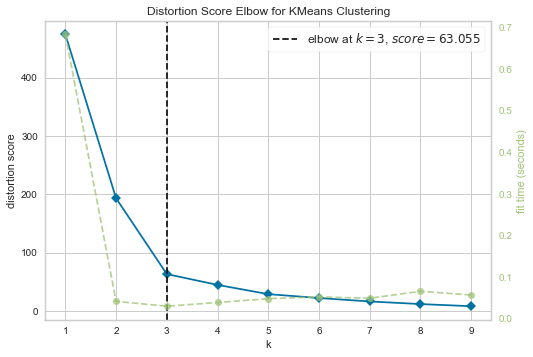

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [64]:
model = KMeans()
visualize = KElbowVisualizer(model, k=(1,10))
visualize.fit(world_scaled)
visualize.poof()

In [68]:
k= int(input('Number of clusters: '))
model = KMeans(n_clusters=k, random_state=1)
model.fit(world_scaled)
df['KMean_labels']=model.labels_

df_groupby= df.groupby(['KMean_labels']).mean()
cat = {}
lst.remove('Country')


for k in range(k):
    cat[k]=''

for k in range(k+1):
    for i, j in enumerate(lst):
        new_list = [round(item, 2) for item in list(df_groupby[j])]
        j= j.replace('_', ' ')
        j= j.title()
        p= new_list[k]
        s= j+': '+ str(p)+ '\n'
        cat[k]= cat[k] + s
       
lst.append('Country')

df['KMean_labels']=df['KMean_labels'].map(cat)

s='''   aliceblue, antiquewhite, aqua, aquamarine, azure, beige, bisque, black, blanchedalmond, blue,
        blueviolet, brown, burlywood, cadetblue, chartreuse, chocolate, coral, cornflowerblue,cornsilk, crimson, 
        cyan, darkblue, darkcyan, darkgoldenrod, darkgray, darkgrey, darkgreen, darkkhaki, darkmagenta, 
        darkolivegreen, darkorange, darkorchid, darkred, darksalmon, darkseagreen,darkslateblue, darkslategray, 
        darkslategrey, darkturquoise, darkviolet, deeppink, deepskyblue, dimgray, dimgrey, dodgerblue, firebrick,
        floralwhite, forestgreen, fuchsia, gainsboro, ghostwhite, gold, goldenrod, gray, grey, green,
        greenyellow, honeydew, hotpink, indianred, indigo, ivory, khaki, lavender, lavenderblush, lawngreen,
        lemonchiffon, lightblue, lightcoral, lightcyan, lightgoldenrodyellow, lightgray, lightgrey,
        lightgreen, lightpink, lightsalmon, lightseagreen, lightskyblue, lightslategray, lightslategrey,
        lightsteelblue, lightyellow, lime, limegreen, linen, magenta, maroon, mediumaquamarine, mediumblue,
        mediumorchid, mediumpurple, mediumseagreen, mediumslateblue, mediumspringgreen,mediumturquoise, mediumvioletred,
        midnightblue, mintcream, mistyrose, moccasin, navajowhite, navy, oldlace, olive, olivedrab, orange, orangered,
        orchid, palegoldenrod, palegreen, paleturquoise, palevioletred, papayawhip, peachpuff, peru, pink,
        plum, powderblue, purple, red, rosybrown, royalblue, saddlebrown, salmon, sandybrown,
        seagreen, seashell, sienna, silver, skyblue, slateblue, slategray, slategrey, snow, springgreen,
        steelblue, tan, teal, thistle, tomato, turquoise, violet, wheat, white, whitesmoke, yellow, yellowgreen
        '''
li=s.split(',')
li=[l.replace('\n','') for l in li]
li=[l.replace(' ','') for l in li]

import random
# colors= random.choices(li, k=k+1)

chocolate= '''chocolate, darkgreen'''.split(', ')

turquoise= '''turquoise, darkkhaki, black'''.split(', ')
yellowgreen= '''yellowgreen, olive, forest green'''.split(', ')
d3= {'t':turquoise, 'y':yellowgreen}

magenta= '''magenta, goldenrod, turquoise, darkred'''.split(', ')
antiquewhite= '''antiquewhite, salmon, teal, steelblue'''.split(', ')
navy= '''navy, bisque, darkorange, goldenrod'''.split(', ')
yellow= '''yellow, magenta, cyan, black'''.split(', ')
lightpink= '''lightpink, palegreen, skyblue, darkslateblue'''.split(', ')
palevioletred= '''palevioletred, mediumvioletred, navajowhite, darkred'''.split(', ')
d4= {'m':magenta, 'a':antiquewhite, 'n':navy, 'y':yellow, 'l':lightpink, 'p':palevioletred}

bisque= '''bisque, blueViolet, brown, coral, darkgreen'''.split(', ')

beige= '''beige, maroon, tan, black, darkolivegreen, darkseegreen'''.split(', ')

k += 1
if k==2: colors= chocolate
elif k==3: colors= random.choice(list(d3.values()))
elif k==4: colors= random.choice(list(d4.values()))
elif k==5: colors= bisque
elif k==6: colors= beige

else: colors= random.choices(li, k=k) 

title= region.title()
fig= px.choropleth(df, locationmode='country names', locations='Country', color=df['KMean_labels'], 
                   color_discrete_sequence= colors, scope= region, title= title)
# color_continuous_scale="Viridis",
# color_discrete_sequence= colors,
# , title='finally'
fig.update_layout(legend=dict(
    yanchor="bottom",
    y=0.99,
    xanchor='left',
    x=0.01
))
fig.update_layout(legend_orientation='h')


fig.show()

#xanchor: ['auto', 'left', 'center', 'right']

Number of clusters: 3


C:\Users\tina\AppData\Local\Temp\ipykernel_19720\2116536177.py:6: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.



In [69]:
lst=['Country']
while True:
    choice = input(">")
    lst.append(choice)
    if choice == 'b':
        lst.remove('b')
        break

>Urban Population (%)
>Median Age
>Industry Labour
>b


In [70]:
region = input('Choose from list: ')

Choose from list: africa


In [71]:
nested_list= []

for i, j in enumerate(lst):
    l= list(dct[region][j])
    # c = [x for x in l if x == x]
    # nested_list.append(c)
    nested_list.append(l)
    
df = pd.DataFrame(nested_list).T
df.columns= lst
df=df.dropna()
# df.reset_index(drop=True)
df2= df.drop(['Country'], axis=1)

world_scaled = StandardScaler().fit_transform(df2)

C:\Users\tina\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



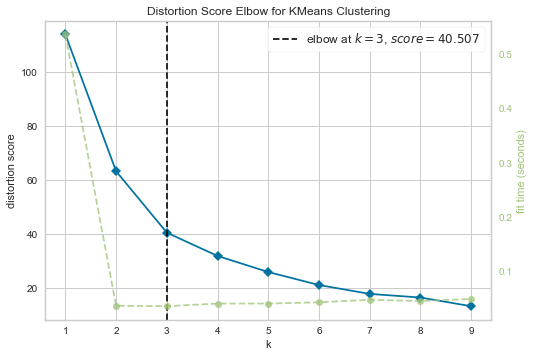

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [72]:
model = KMeans()
visualize = KElbowVisualizer(model, k=(1,10))
visualize.fit(world_scaled)
visualize.poof()

In [74]:
k= int(input('Number of clusters: '))
model = KMeans(n_clusters=k, random_state=1)
model.fit(world_scaled)
df['KMean_labels']=model.labels_

df_groupby= df.groupby(['KMean_labels']).mean()
cat = {}
lst.remove('Country')


for k in range(k):
    cat[k]=''

for k in range(k+1):
    for i, j in enumerate(lst):
        new_list = [round(item, 2) for item in list(df_groupby[j])]
        j= j.replace('_', ' ')
        j= j.title()
        p= new_list[k]
        s= j+': '+ str(p)+ '\n'
        cat[k]= cat[k] + s
       
lst.append('Country')

df['KMean_labels']=df['KMean_labels'].map(cat)

s='''   aliceblue, antiquewhite, aqua, aquamarine, azure, beige, bisque, black, blanchedalmond, blue,
        blueviolet, brown, burlywood, cadetblue, chartreuse, chocolate, coral, cornflowerblue,cornsilk, crimson, 
        cyan, darkblue, darkcyan, darkgoldenrod, darkgray, darkgrey, darkgreen, darkkhaki, darkmagenta, 
        darkolivegreen, darkorange, darkorchid, darkred, darksalmon, darkseagreen,darkslateblue, darkslategray, 
        darkslategrey, darkturquoise, darkviolet, deeppink, deepskyblue, dimgray, dimgrey, dodgerblue, firebrick,
        floralwhite, forestgreen, fuchsia, gainsboro, ghostwhite, gold, goldenrod, gray, grey, green,
        greenyellow, honeydew, hotpink, indianred, indigo, ivory, khaki, lavender, lavenderblush, lawngreen,
        lemonchiffon, lightblue, lightcoral, lightcyan, lightgoldenrodyellow, lightgray, lightgrey,
        lightgreen, lightpink, lightsalmon, lightseagreen, lightskyblue, lightslategray, lightslategrey,
        lightsteelblue, lightyellow, lime, limegreen, linen, magenta, maroon, mediumaquamarine, mediumblue,
        mediumorchid, mediumpurple, mediumseagreen, mediumslateblue, mediumspringgreen,mediumturquoise, mediumvioletred,
        midnightblue, mintcream, mistyrose, moccasin, navajowhite, navy, oldlace, olive, olivedrab, orange, orangered,
        orchid, palegoldenrod, palegreen, paleturquoise, palevioletred, papayawhip, peachpuff, peru, pink,
        plum, powderblue, purple, red, rosybrown, royalblue, saddlebrown, salmon, sandybrown,
        seagreen, seashell, sienna, silver, skyblue, slateblue, slategray, slategrey, snow, springgreen,
        steelblue, tan, teal, thistle, tomato, turquoise, violet, wheat, white, whitesmoke, yellow, yellowgreen
        '''
li=s.split(',')
li=[l.replace('\n','') for l in li]
li=[l.replace(' ','') for l in li]

import random
# colors= random.choices(li, k=k+1)

chocolate= '''chocolate, darkgreen'''.split(', ')

turquoise= '''turquoise, darkkhaki, black'''.split(', ')
yellowgreen= '''yellowgreen, olive, forest green'''.split(', ')
d3= {'t':turquoise, 'y':yellowgreen}

magenta= '''magenta, goldenrod, turquoise, darkred'''.split(', ')
antiquewhite= '''antiquewhite, salmon, teal, steelblue'''.split(', ')
navy= '''navy, bisque, darkorange, goldenrod'''.split(', ')
yellow= '''yellow, magenta, cyan, black'''.split(', ')
lightpink= '''lightpink, palegreen, skyblue, darkslateblue'''.split(', ')
palevioletred= '''palevioletred, mediumvioletred, navajowhite, darkred'''.split(', ')
d4= {'m':magenta, 'a':antiquewhite, 'n':navy, 'y':yellow, 'l':lightpink, 'p':palevioletred}

bisque= '''bisque, blueViolet, brown, coral, darkgreen'''.split(', ')

beige= '''beige, maroon, tan, black, darkolivegreen, darkseegreen'''.split(', ')

k += 1
if k==2: colors= chocolate
elif k==3: colors= random.choice(list(d3.values()))
elif k==4: colors= random.choice(list(d4.values()))
elif k==5: colors= bisque
elif k==6: colors= beige

else: colors= random.choices(li, k=k) 

title= region.title()
fig= px.choropleth(df, locationmode='country names', locations='Country', color=df['KMean_labels'], 
                   color_discrete_sequence= colors, scope= region, title= title)
# color_continuous_scale="Viridis",
# color_discrete_sequence= colors,
# , title='finally'
fig.update_layout(legend=dict(
    yanchor="bottom",
    y=0.99,
    xanchor='left',
    x=0.01
))
fig.update_layout(legend_orientation='h')


fig.show()

#xanchor: ['auto', 'left', 'center', 'right']

Number of clusters: 4


C:\Users\tina\AppData\Local\Temp\ipykernel_19720\2116536177.py:6: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.



In [ ]:
colors

In [ ]:
k

In [ ]:
li

In [ ]:
Country                 236 non-null    object 
 1   Population              236 non-null    Int64  
 2   Yearly Change           236 non-null    float64
 3   Net Change              236 non-null    Int64  
 4   Density  (P/Km²)        236 non-null    float64
 5   Land Area (Km²)         236 non-null    Int64  
 6   Migrants (Net)          202 non-null    Int64  
 7   Fertility Rate          202 non-null    float64
 8   Median Age              202 non-null    Int64  
 9   Urban Population (%)    223 non-null    Int64  
 10  World Share             236 non-null    float64
 11  Code                    210 non-null    object 
 12  Rural Population        208 non-null    Int64  
 13  Cost of Living Index    136 non-null    float64
 14  Rent Index              136 non-null    float64
 15  Groceries Index         136 non-null    float64
 16  Restaurant Price Index  136 non-null    float64
 17  Gini Index              151 non-null    float64
 18  Growth Rate             164 non-null    float64
 19  Birth Rate              178 non-null    float64
 20  Infant Mortality Rate   179 non-null    float64
 21  Life Expectancy         180 non-null    float64
 22  Inflation (2020)        165 non-null    float64
 23  Unemployment            153 non-null    float64
 24  Agriculture Labour      143 non-null    float64
 25  Services Labour         141 non-null    float64
 26  Industry Labour         140 non-null    float64
dtypes: Int64(7), float64(18), object(2)

In [ ]:
# world4 = world4.replace(pd.NA, np.nan)
# world4= world4.where(pd.notnull(df), np.nan)
# world4['Urban Population (%)'] = world4['Urban Population (%)'].replace({pd.NA: np.nan})
world4['Urban Population (%)'].replace({'<NA>': np.nan}, inplace = True)

In [ ]:
pd.set_option('display.max_columns', None)
world4.head(150)

In [ ]:
pd.set_option('display.max_rows', None)
a= world4['Urban Population (%)']
a.head(150)

In [ ]:
h= world4[['Country', 'Gini Index', 'Industry Labour']]
h

In [ ]:
g=h.dropna()
g

In [ ]:
print(g.reset_index(drop=True))

In [ ]:
world.to_csv('C:/Users/tina/Desktop/data/WORLD.csv')

In [ ]:
world.info()

In [ ]:
list(world)

In [ ]:
['Population',
 'Yearly Change',
 'Net Change',
 'Density  (P/Km²)',
 'Land Area (Km²)',
 'Migrants (Net)',
 'Fertility Rate',
 'Median Age',
 'Urban Population (%)',
 'World Share',
 'Rural Population',
 'Gini Index',
 'Growth Rate',
 'Birth Rate',
 'Infant Mortality Rate',
 'Life Expectancy',
 'Inflation (2020)',
 'Unemployment',
 'Agriculture Labour',
 'Services Labour',
 'Industry Labour',]

In [ ]:
wrld= world.copy()

In [ ]:
del wrld["Country"]
del wrld["Code"]
del wrld["Region"]

In [ ]:
#WCSS of clusters
wcss = [] 
# using for loop to iterates
for i in range(1,15):
    
    #training k-means clustering in python on different clusters
    km = KMeans(n_clusters= i)
    km.fit(df2)
    wcss.append(km.inertia_)
    
# ploting the elbow graph
plt.plot(range(1,15), wcss, 'og-')
# plt.annotate('optimum clusters', xy=(5, 500), xytext=(6, 100), arrowprops=dict(facecolor='blue', shrink=0.05))
# labeling the data
plt.xlabel("Number of clusters")
plt.ylabel("Inertia");

In [ ]:
import plotly.graph_objects as go
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 500, n_init = 10, random_state = 123)
    kmeans.fit(world4_scaled)
    wcss.append(kmeans.inertia_)
    
fig = go.Figure(data = go.Scatter(x = list(range(1,15)), y = wcss))


fig.update_layout(title='WCSS vs. Cluster number',
                   xaxis_title='Clusters',
                   yaxis_title='WCSS')
fig.show()

In [ ]:
range(1,15)

In [ ]:
fig= visualize.poof()
fig.show()

In [ ]:
lst=[]
while True:
    choice = input(">")
    lst.append(choice)
    if choice == 'b':
        lst.remove('b')
        break

In [ ]:
['Population','Yearly Change','Net Change','Density  (P/Km²)','Land Area (Km²)','Migrants (Net)','Fertility Rate',
 'Median Age','Urban Population (%)','World Share','Country']

In [ ]:
cols = population1.columns.tolist()
cols